## Title :

B-Splines (Cubic) Regression

## Description :
After this exercise, you should see a plot that looks like :


<img src="../fig/fig1_bspline.png" style="width: 500px;">


## Hints: 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html" target="_blank">scipy.interpolate.splrep</a>

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.BSpline.html" target="_blank">scipy.interpolate.BSpline</a>

Refer to lecture notebook.

Do not change any other code except the blanks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import splrep
from scipy.interpolate import BSpline

%matplotlib inline 

In [2]:
df = pd.read_csv('../data/data1.csv')
df = df.sort_values('x')
df.head()

,x,y
73,0.006248,17.329551
142,0.104671,15.268703
34,0.246137,15.394678
17,0.420595,12.743181
5,0.455565,15.480800


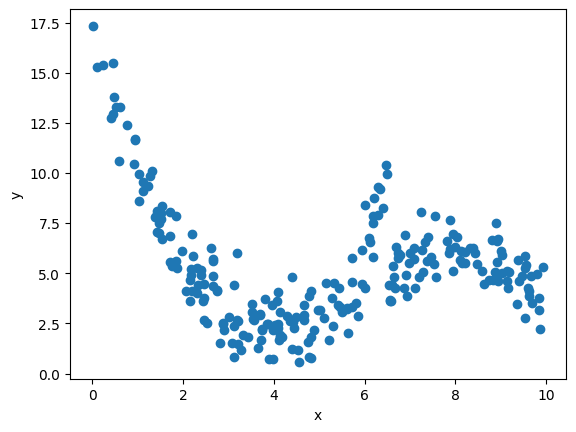

In [3]:
plt.scatter(df.x, df.y);
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**A (cubic) B-spline regression of y on x, with knots chosen at the quartiles.**

In [ ]:
#Get quartiles (knots)
quarts = df['x'].quantile([0.25, 0.5, 0.75]).values.reshape(-1)
print(quarts)

[2.74220877 4.82472501 7.26165491]


(3,)

In [ ]:
# scipy spline representation method requires distinct x values and sorted in increasing order Schoenberg-Whitney conditions 
df_sorted = df
df_sorted['x'] = df_sorted['x'] + np.random.normal(0,0.001,len(df_sorted))
df_sorted = df_sorted.sort_values(['x'])

In [6]:
### edTest(test_splrep) ###
#Find the BSpline representation using splrep()
def test_splrep():
    t,c,k = splrep(df_sorted['x'].values, df_sorted['y'].values, t=quarts)
    return t,c,k

t,c,k = test_splrep()
#A tuple (t,c,k) containing the vector of knots, the B-spline coefficients, and the degree of the spline.


In [7]:
### edTest(test_bspline_model) ###
def test_bspline_model():
    return BSpline(t,c,k)

b_spline_model = test_bspline_model()

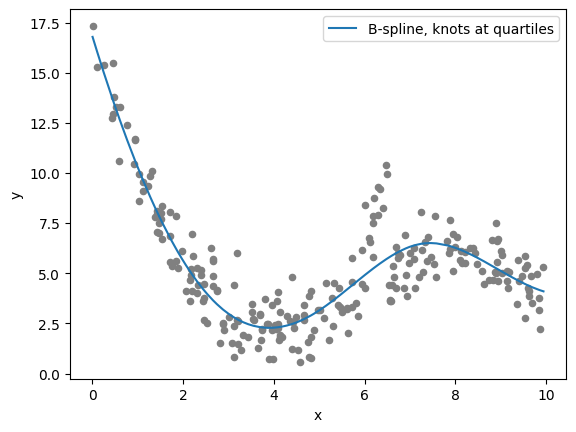

In [8]:
ax = df.plot.scatter(x='x',y='y',c='grey')
ax.plot(df['x'], b_spline_model(df['x']), label="B-spline, knots at quartiles")
plt.legend()
plt.show()